# Duke History in the Rubenstein Library Card Catalog

Duke University has a long and storied past, with many individuals shaping the school through leadership and monetary support. We plan to dig deeper into what of Duke history is present in the card catalog files and see what that can tell us about the institution.

## Duke Presidential Last Names in the Card Catalog

*Packages used:* Like most of our code, we have used the Python pandas package as a way to work with the dataset in the format of a pandas dataframe. The plots are created using the Matplotlib package and scipy, which is used to perform the linear regression. Re, or regular expression is used to detect patterns in text, allowing us to search for instances of presidential names in the catalog.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy import stats
import operator
pd.set_option('display.max_colwidth', None)

First we will be exploring the presidents of Duke University and their prevalence within the card catalog. The current President, Vincent Price, will be excluded since his last name is commonly found in the cards with another meaning and his time at Duke is well past the time of the catalog. Interestingly enough, the penultimate President's name appears in the cards (Richard Brodhead) despite his not coming to Duke until after the card catalog was digitized. Perhaps this eponymous figure was an ancestor of the one we know in relation to Duke today. We will be searching by last name, to see the frequency of the Presidents' last names in the catalog. A few of the presidents have surnames that have alternate meanings or uses (e.g., York, Wood) and we will attempt to remove the non-name occuraces of these. A disclamer to this analysis is that this method only captures names that were both properly spelled in the catloging process and translated into text accurately by our OCR software; it is likely that there are some misspelled names that did not make it thorugh the calculations.

In [2]:
# Read in dataset
df = pd.read_csv("main_entry_dataset.csv")

# First Approach

### Name Counting

In [3]:
# Duke University presidents in chronological order
presidents = {"York": 0, "Craven": 0, "Gannaway": 0, "Craven": 0, "Wood": 0, "Crowell": 0, "Kilgo": 0, "Few": 0, "Flowers": 0,
    "Edens": 0, "Hart": 0, "Knight": 0,"Sanford": 0, "Brodie": 0, "Keohane": 0, "Brodhead": 0}

# Check for occurances of presidental last names in the cards
for index, row in df.iterrows():
    for pres in presidents.keys():
        if pres in str(row['Text']):
            # Check for homonyms
            x = str(row['Text'])
            if pres == "York" and ("New" in x or "Yorktown" in x or "Yorkshire" in x or "England" in x or "Yorkville" in x or "in York" in x or "York Co" in x.title() or "of York" in x or "York City" in x or "York Dist" in x.title() or "Yorke" in x):
                continue
            elif pres == "Craven" and "Craven Co" in x.title():
                continue
            elif pres == "Wood" and (re.search(r"Wood[a-z-]", x) or "Wood County" in x):
                continue
            elif pres == "Kilgo" and re.search(r"Kilgo[a-z]", x):
                continue
            elif pres == "Hart" and re.search(r"Hart[a-z]", x):
                continue
            elif pres == "Knight" and (re.search(r"Knight[a-z]", x) or re.search(r"[a-z]Knight", x)):
                continue
            elif pres == "Sanford" and (re.search(r"Sanford,.*North Carolina", x) or "in Sanford" in x or "of Sanford" in x or "at Sanford" in x or "Railway" in x):
                continue
            else:
                presidents[pres] = presidents.get(pres) + 1

print(presidents)

{'York': 55, 'Craven': 97, 'Gannaway': 5, 'Wood': 192, 'Crowell': 10, 'Kilgo': 19, 'Few': 65, 'Flowers': 87, 'Edens': 3, 'Hart': 139, 'Knight': 81, 'Sanford': 145, 'Brodie': 15, 'Keohane': 0, 'Brodhead': 5}


In [4]:
# Counts of last name frequency after running above code
president_counts = {'York': 55, 'Craven': 97, 'Gannaway': 5, 'Wood': 192, 'Crowell': 10, 'Kilgo': 19, 'Few': 65, 
    'Flowers': 87, 'Edens': 3, 'Hart': 139, 'Knight': 81, 'Sanford': 145, 'Brodie': 15, 'Keohane': 0, 'Brodhead': 5}

# Frequency of presidential last names as of the 1990 US census
census_freqs = {'York': 0.019, 'Craven': 0.006, 'Gannaway': 0.001, 'Wood': 0.098, 'Crowell': 0.007, 'Kilgo': 0.001, 
    'Few': 0.001, 'Flowers': 0.028, 'Edens': 0.002, 'Hart': 0.054, 'Knight': 0.060, 'Sanford': 0.015, 'Brodie': 0.002, 
    'Keohane': 0.000, 'Brodhead': 0.000}

### Frequency Plotting

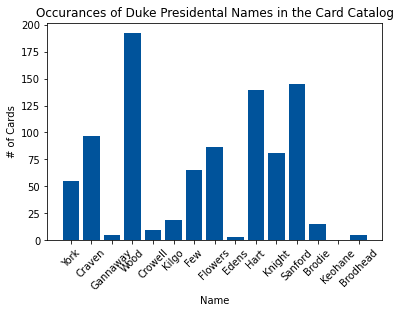

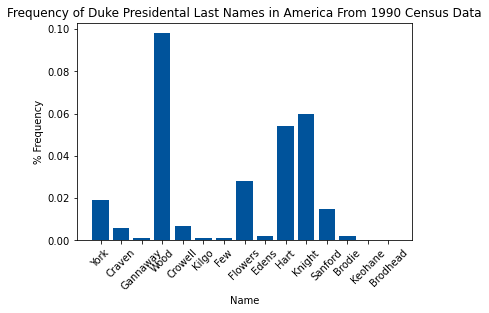

In [5]:
# Disply bar chart of last name occurances
plt.bar(*zip(*president_counts.items()), color='#00539B')
plt.xticks(rotation = 45)
plt.title("Occurances of Duke Presidental Names in the Card Catalog")
plt.xlabel("Name")
plt.ylabel("# of Cards")
plt.show()

# Display bar chart of last name frequencies based on the 1990 census data
plt.bar(*zip(*census_freqs.items()), color='#00539B')
plt.xticks(rotation = 45)
plt.title("Frequency of Duke Presidental Last Names in America From 1990 Census Data")
plt.xlabel("Name")
plt.ylabel("% Frequency")
plt.show()

The first bar chart shows the frequencies of the Duke presidential last names within the card catalog, in order of presidental appointment. There does not appear to be any trend over time amongst the names. When comparing to the 1990 census data of last name frequency in the United States, some names are similarly more frequent than others (e.g., Wood and Hart) or similarly infrequent (e.g. Gannaway, Edens, and Keohane). Some presidents, however, have statistically uncommon last names but a large amount of occurances in the card catalog (Craven, Few, Sanford). Are there other factors at play? Let's see how this compares to the amount of time each person spent in office.

#### Occurances versus Time in Office

Each of these Presidents served varied time spans in office, let's see if there is a relationship between the length of time they spent in office and the amount of times they were mentioned in cards in the catalog. Preseident Craven served two nonconsecutive terms, so his time in office will be the addition of the two terms.

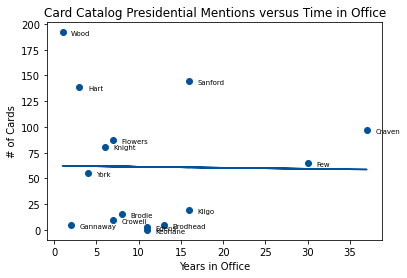

In [34]:
terms = [4, 37, 2, 1, 7, 16, 30, 7, 11, 3, 6, 16, 8, 11, 13]
counts = [55, 97, 5, 192, 10, 19, 65, 87, 3, 139, 81, 145, 15, 0, 5]
last = ["York", "Craven", "Gannaway", "Wood", "Crowell", "Kilgo", "Few", "Flowers", "Edens", "Hart", "Knight", "Sanford", "Brodie", "Keohane", "Brodhead"]

# Regression code adapted from https://www.w3schools.com/python/python_ml_linear_regression.asp
slope, intercept, r, p, std_err = stats.linregress(terms, counts)
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, terms))

# Plot points with name labels, regression line
plt.scatter(terms, counts, color='#00539B')
for i in range(len(terms)):
    plt.annotate(last[i], (terms[i] + 1, counts[i] - 3), fontsize=7)   
plt.plot(terms, mymodel, color='#00539B')
plt.title("Card Catalog Presidential Mentions versus Time in Office")
plt.xlabel("Years in Office")
plt.ylabel("# of Cards")
plt.show()

Shown above is a scatterplot of the number of cards on which a presidential last name is mentioned versus the amount of time they spent in office. We ran a linear regression on the data and found **no correlation** between these two variables. Time in office appears not to impact the prevalence of presidential last names in the catalog. What else is going on here? Let's check the catalog for both first *and* last names.

# Second Approach

### Presidental First and Last Names

A common occurrance in the card catalog is the presence of multiple generations of family members. By looking at the *last* names of presidents, we were able to look for more general trends in regards to the presidents' names, but are unable to determine just how many of the last names gleaned are actually related to the president or their family members. Next we will look into instances where the specific presidents' *first and last* names occur in the files, with hopes of learning more about the history and prevalence of these figures within the card catalog.

In [23]:
# Read in dataframe and pull out wanted, non-null columns
df = pd.read_csv("main_entry_dataset.csv")
df = df[~df.Name.isnull()]
df = df[~df.Text.isnull()]
df = df.iloc[:,[2,3,8,9,10]]

# Using these regexes, we can find if both words occur in a row, e.g. Craven, Braxton
base = r'^{}'
expr = '(?=.*{})'

# Names to look for occuring together
full_names = [["York","Brantley"], ["Craven", "Braxton"], ["Gannaway", "William"], ["Wood", "Marquis"], ["Crowell", "John"],
    ["Kilgo", "John"], ["Few", "William"], ["Flowers", "Robert"], ["Edens", "Arthur"], ["Hart", "Julian"],
    ["Knight", "Douglas"], ["Sanford", "Terry"], ["Brodie", "Keith"], ["Keohane", "Nannerl"], ["Brodhead", "Richard"]]

York was found 55 times according to the previous method, but most talk about cities & counties or unrelated people with the same last name. There are probably very few talking about the president. This better extracts the president names by checking for the occurence of both last and first names.

In [24]:
name_counts = []

for name in full_names:
    name_counts.append(len(df[df.Text.str.contains(base.format(''.join(expr.format(w) for w in name)),case=True)]))

print(name_counts)

[4, 36, 5, 5, 5, 10, 34, 15, 0, 1, 4, 17, 0, 0, 3]


When we check for both the first and last names of the Duke presidents, we get markedly fewer results, but more accurate ones. Let's take a look at the frequency of each president's mentions.

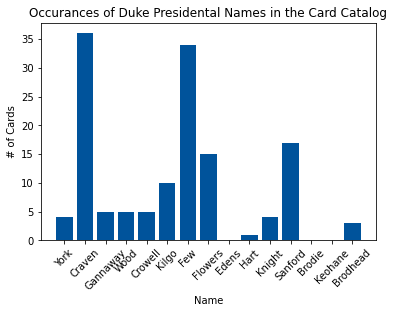

In [25]:
last = ["York", "Craven", "Gannaway", "Wood", "Crowell", "Kilgo", "Few", "Flowers", "Edens", "Hart", "Knight", "Sanford", "Brodie", "Keohane", "Brodhead"]
name_counts = [4, 36, 5, 5, 5, 10, 34, 15, 0, 1, 4, 17, 0, 0, 3]

# Disply bar chart of first and last name occurances
plt.bar(last, name_counts, color='#00539B')
plt.xticks(rotation = 45)
plt.title("Occurances of Duke Presidental Names in the Card Catalog")
plt.xlabel("Name")
plt.ylabel("# of Cards")
plt.show()

It looks like some of the presidents with more common last names, like Wood, Knight, and Hart, have gone down in frequency when we also check for first names. Let's compare with the length of time in office.

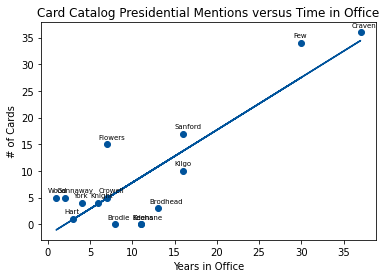

In [33]:
terms = [4, 37, 2, 1, 7, 16, 30, 7, 11, 3, 6, 16, 8, 11, 13]

# Linear regression code adapted from https://www.w3schools.com/python/python_ml_linear_regression.asp
slope, intercept, r, p, std_err = stats.linregress(terms, name_counts)
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, terms))

# Plot labeled points, regression line
plt.scatter(terms, name_counts, color='#00539B')
for i in range(len(terms)):
    plt.annotate(last[i], (terms[i] - 1, name_counts[i] + 1), fontsize=7)
plt.plot(terms, mymodel, color='#00539B')
plt.title("Card Catalog Presidential Mentions versus Time in Office")
plt.xlabel("Years in Office")
plt.ylabel("# of Cards")
plt.show()

When we run a linear regression on first and last name occurrances versus years a president was in office, we find a **positive** correlation between the variables. So, as the number of years in office a president had increases, the number of cards on which they are mentioned increases.

## Qualitative Analysis of Duke Presidents in the Catalog

Let's see what the collections containing the Duke Presidents' full names are talking about and whether they are indeed mentioning the presidents. To do this, we searched through the instances where a president's first and last name appeared in the catalog, briefly summarized the mention, and provided relevant links.

### Keith Brodie, Nannerel Keohane, and Arthur Edens

Presidents Brodie, Keohane, and Edens were not mentioned in the card catalog.

### Julian Hart

The card containing "Julian" and "Hart" is not referring to the Duke president.

### Richard Brodhead

On two cards, a Richard Brodhead is mentioned, but not the one who was president of Duke. Upon further inspection, this man was a [U.S. Democratic Senator from Pennsylvania](https://en.wikipedia.org/wiki/Richard_Brodhead). The cards upon which he is mentioned can be viewed [here](https://archive.org/details/rubensteinmanuscriptcatalog_P_to_Peo/page/44/mode/2up) and [here](https://archive.org/details/rubensteinmanuscriptcatalog_Pep_to_Pn/page/n393/mode/2up).

### Douglas Knight

President Douglas Knight is mentioned as having [correspondence with Herbert Clarence Bradshaw](https://archive.org/details/rubensteinmanuscriptcatalog_R._Boyd_to_I._Brown/page/n125/mode/2up), being the recipient of a [letter from a Mr. Matton](https://archive.org/details/rubensteinmanuscriptcatalog_Mani_to_Maw/page/3/mode/2up) and [letters from William Murray Werber](https://archive.org/details/rubensteinmanuscriptcatalog_Ware_to_H._White/page/n567/mode/2up). The first two mention religion and all involve letters.

### Brantley York

One [card](https://archive.org/details/rubensteinmanuscriptcatalog_X_to_Z/page/n83/mode/2up) simply prompts a look to the Duke University Archives. York is mentioned here as [correspondent to Tod Robinson Caldwell](https://archive.org/details/rubensteinmanuscriptcatalog_M._Butler_to_Caq/page/n202/mode/2up). 

[This collection](https://archive.org/details/rubensteinmanuscriptcatalog_Durh_to_Els/page/n586/mode/2up) mentions early foundations of Duke Univesity and President Craven.

Here is [York's son's collection](https://archive.org/details/rubensteinmanuscriptcatalog_X_to_Z/page/n89/mode/2up).

### William Gannaway

Four cards mention William Gannaway Brownlow, former Governor of Tennesee and one is a prompt to [see the archives](https://archive.org/details/rubensteinmanuscriptcatalog_Fro_to_Geq/page/n322/mode/2up).

### Marquis Wood

Like many of the other presidents, Wood has a [card](https://archive.org/details/rubensteinmanuscriptcatalog_S._Williams_to_Wood/page/n717/mode/2up) prompting a check of the archives.

Marquis Wood also has two collections of [papers](https://archive.org/details/rubensteinmanuscriptcatalog_Meth_to_Mh/page/59/mode/2up) associated with the Methodist Episcopal [Church](https://archive.org/details/rubensteinmanuscriptcatalog_Meth_to_Mh/page/n344/mode/2up).

In William Clark Doub's [collection](https://archive.org/details/rubensteinmanuscriptcatalog_Del_to_Dov/page/19/mode/2up), Wood's manuscript on the introduction of Methodism into the Yadkin Valley is mentioned.

### John Crowell

We, of course, have the entry under Crowell's name to [See Duke University Archives](https://archive.org/details/rubensteinmanuscriptcatalog_Cre_to_I._Davis/page/n119/mode/2up).

This [card](https://archive.org/details/rubensteinmanuscriptcatalog_A_to_Amer/page/n127/mode/2up) mentions a quarrel between Crowell and his faculty.

[This](https://archive.org/details/rubensteinmanuscriptcatalog_Mus_to_Nn/page/n105/mode/2up) and [this](https://archive.org/details/rubensteinmanuscriptcatalog_Gri_to_Hand/page/n131/mode/2up) mention letters to and from John Crowell.

[Here](https://archive.org/details/rubensteinmanuscriptcatalog_V_to_Ward/page/n85/mode/2up) Crowell is part of a list of unpublished sketches of well-known North Carolinians.

### John Kilgo

Here we have the boilerplate John Kilgo [card](https://archive.org/details/rubensteinmanuscriptcatalog_K_to_Kira/page/n489/mode/2up).

Kilgo is listed as a correspondent in the Hemphill Family [Collection](https://archive.org/details/rubensteinmanuscriptcatalog_Harw_to_Hem/page/23/mode/2up).

Kilgo appears to have been involved in the Methodist Episcopal Church [here](https://archive.org/details/rubensteinmanuscriptcatalog_Meth_to_Mh/page/n503/mode/2up) and [here](https://archive.org/details/rubensteinmanuscriptcatalog_Mi_to_Mord/page/n686/mode/2up).

Correspondence with President Kilgo is mentioned [here](https://archive.org/details/rubensteinmanuscriptcatalog_Ton_to_Tz/page/n668/mode/2up) and [here](https://archive.org/details/rubensteinmanuscriptcatalog_Wi._Smith_to_So/page/n642/mode/2up) in relation to the Southgates.

Kilgo seems to be something of a controversial and outspoken character, as [here](https://archive.org/details/rubensteinmanuscriptcatalog_J._Brown_to_L._Butler/page/n675/mode/2up) and [here](https://archive.org/details/rubensteinmanuscriptcatalog_Ton_to_Tz/page/81/mode/2up) he is spoken of positively and [here](https://archive.org/details/rubensteinmanuscriptcatalog_A_to_Amer/page/n157/mode/2up) and [here](https://archive.org/details/rubensteinmanuscriptcatalog_Wi._Smith_to_So/page/n639/mode/2up) he is said to be involved in a court case.

### Robert Flowers

In addition to the requisite Flowers [card](https://archive.org/details/rubensteinmanuscriptcatalog_Fif_to_Frn/page/n276/mode/2up) we have correspondence between Flowers and others [here](https://archive.org/details/rubensteinmanuscriptcatalog_Conl_to_Crd/page/n265/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_Gre_to_Grh/page/n605/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_No_to_Oz/page/151/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_Wi._Smith_to_So/page/n632/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_Wi._Smith_to_So/page/n638/mode/2up), and [here](https://archive.org/details/rubensteinmanuscriptcatalog_J._Thomas_to_Tom/page/n73/mode/2up).

President Flowers is praised [here](https://archive.org/details/rubensteinmanuscriptcatalog_Ton_to_Tz/page/81/mode/2up) along with some other notable Dukies and had gifted some items related to the Methodist Church [here](https://archive.org/details/rubensteinmanuscriptcatalog_Meth_to_Mh/page/n17/mode/2up).

He is also in a [photograph](https://archive.org/details/rubensteinmanuscriptcatalog_Lowr_to_Mack/page/n115/mode/2up) that is cataloged and is said to have written a biography of [Edwin W. Fuller](https://archive.org/details/rubensteinmanuscriptcatalog_Fro_to_Geq/page/n95/mode/2up).

### Terry Sanford

As Terry Sanford was a US Senator and NC Governor as well as a President of Duke, there appear to be many cards mentioning him. Cards mentioning correspondence with Sanford can be found [here](https://archive.org/details/rubensteinmanuscriptcatalog_R._Boyd_to_I._Brown/page/n126/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_Claw_to_Com/page/n498/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_Claw_to_Com/page/n506/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_Hold_to_Huba/page/n149/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_J._Thomas_to_Tom/page/80/mode/2up), and [here](https://archive.org/details/rubensteinmanuscriptcatalog_Ton_to_Tz/page/n177/mode/2up).

[This](https://archive.org/details/rubensteinmanuscriptcatalog_Wi._Smith_to_So/page/n580/mode/2up) talks about the Southern Rural Poverty Project, directed by members of the Sanford Institute of Public Policy.

[Here](https://archive.org/details/rubensteinmanuscriptcatalog_Claw_to_Com/page/n519/mode/2up) and [here](https://archive.org/details/rubensteinmanuscriptcatalog_Hane_to_Harv/page/n9/mode/2up) are collections that catalog items that talk about Sanford.

[Here] and on subsequent pages we have a restricted collection relating to manuscripts created by Terry Sanford, related to his time as Governor and Duke President. And [here](https://archive.org/details/rubensteinmanuscriptcatalog_San_to_Sem/page/n73/mode/2up) there are documents related to his time as a US Senator.

### William Few

Few is mentioned as a professor [here](https://archive.org/details/rubensteinmanuscriptcatalog_J._Brown_to_L._Butler/page/1873/mode/2up).

He is included in collections with other important Duke figures [here](https://archive.org/details/rubensteinmanuscriptcatalog_Ben_to_Blac/page/n481/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_Dow_to_Durg/page/n255/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_Fif_to_Frn/page/n292/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_Harw_to_Hem/page/21/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_Pep_to_Pn/page/n47/mode/2up), and [here](https://archive.org/details/rubensteinmanuscriptcatalog_Wi._Smith_to_So/page/n641/mode/2up).

Correspondece with William Few is mentioned [here](https://archive.org/details/rubensteinmanuscriptcatalog_Lanp_to_Ler/page/n223/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_P_to_Peo/page/39/mode/2up), and [here](https://archive.org/details/rubensteinmanuscriptcatalog_V_to_Ward/page/n403/mode/2up).

Few's son, Lynne Few, appears [here](https://archive.org/details/rubensteinmanuscriptcatalog_Ger_to_Gorl/page/n536/mode/2up).

He also has a [collection](https://archive.org/details/rubensteinmanuscriptcatalog_Elt_to_Fie/page/n625/mode/2up) of papers related to war and money.

Ella Howerton Parks remembers Few as the ["prince of all hat doffers."](https://archive.org/details/rubensteinmanuscriptcatalog_P_to_Peo/page/n295/mode/2up).

[This collection](https://archive.org/details/rubensteinmanuscriptcatalog_V_to_Ward/page/n649/mode/2up) talks about a treatise Few signed related to the relations between the northern and southern colonies.

### Braxton Craven

President Craven's great grandson has a rather extensive [collection](https://archive.org/details/rubensteinmanuscriptcatalog_Conl_to_Crd/page/n689/mode/2up) and his grandson is mentioned [here](https://archive.org/details/rubensteinmanuscriptcatalog_Conl_to_Crd/page/n677/mode/2up).

Braxton Craven is cataloged in the 1850 census of Randolph County [here](https://archive.org/details/rubensteinmanuscriptcatalog_Armi_to_Bal/page/n486/mode/2up) along with many transactions under his name. Another money-related [card](https://archive.org/details/rubensteinmanuscriptcatalog_Con_to_Conk/page/n403/mode/2up) mentions a statement for what Trinity College owed a company.

Correspondences involving Craven are cataloged [here](https://archive.org/details/rubensteinmanuscriptcatalog_Durh_to_Els/page/n586/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_Harw_to_Hem/page/n34/mode/2up), and [here](https://archive.org/details/rubensteinmanuscriptcatalog_Harw_to_Hem/page/n88/mode/2up).

Craven is mentioned, but not in much detail [here](https://archive.org/details/rubensteinmanuscriptcatalog_Elt_to_Fie/page/n469/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_Gri_to_Hand/page/n128/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_Harw_to_Hem/page/167/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_J._Johnson_to_Jz/page/n676/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_Lanp_to_Ler/page/27/mode/2up), and [here](https://archive.org/details/rubensteinmanuscriptcatalog_I._White_to_R._Williams/page/n408/mode/2up).

## Duke Building Names in the Catalog

While going through the card catalog, it was striking to see how many of the last names present in the cards were names of buildings at Duke's Durham campus today. Let's explore the prevalence of these names in the catalog.

Taking the names from buildings on Duke's East and West campuses--including dorms, academic buildings, and public spaces--we will check for the building names in the collection header author name columns of our dataset.

In [74]:
buildings = {
'Alspaugh': 0, 'Baldwin': 0, 'Bassett': 0, 'Bivins': 0, 'Blackwell': 0, 'Branson': 0, 'Brodie': 0, 'Brown': 0, 'Crowell': 0,
'Epworth': 0, 'Friedl': 0, 'Gilbert-Addoms': 0, 'Giles': 0, 'Lilly': 0, 'Biddle': 0, 'Pegram': 0, 'Southgate': 0,
'White': 0, 'Wilson': 0, 'Allen': 0, 'Bostock': 0, 'Brodhead': 0, 'Fitzpatrick': 0, 'Flowers': 0, 'Gray': 0, 
'Gross': 0, 'Hart': 0, 'Karsh': 0, 'Levine': 0, 'Perkins': 0, 'Reuben-Cooke': 0,  'Rubenstein': 0, 'Sanford': 0, 
'Teer': 0, 'Wilkinson': 0, 'Craven': 0, 'Crowell': 0, 'Edens': 0, 'Few': 0, 'Keohane': 0,  'Kilgo': 0, 'Wannamaker': 0
}

# Check each collection author's name for matches
for index, row in df.iterrows():
    for b in buildings.keys():
        if b in str(row['Text']):
            buildings[b] = buildings.get(b) + 1
                
print(buildings)

{'Alspaugh': 4, 'Baldwin': 148, 'Bassett': 37, 'Bivins': 1, 'Blackwell': 86, 'Branson': 58, 'Brodie': 15, 'Brown': 826, 'Crowell': 10, 'Epworth': 7, 'Friedl': 2, 'Gilbert-Addoms': 0, 'Giles': 80, 'Lilly': 12, 'Biddle': 133, 'Pegram': 62, 'Southgate': 55, 'White': 613, 'Wilson': 580, 'Allen': 402, 'Bostock': 3, 'Brodhead': 5, 'Fitzpatrick': 10, 'Flowers': 87, 'Gray': 239, 'Gross': 16, 'Hart': 357, 'Karsh': 2, 'Levine': 0, 'Perkins': 177, 'Reuben-Cooke': 0, 'Rubenstein': 0, 'Sanford': 174, 'Teer': 1, 'Wilkinson': 84, 'Craven': 161, 'Edens': 3, 'Few': 65, 'Keohane': 0, 'Kilgo': 25, 'Wannamaker': 2}


When we look in the dataset at large, nearly all of the names are present. However, this is certainly not entirely accurate when considering what we are looking for. As we saw with the presidents deep dive, many names have double meanings or can also be first names. Let's check in just the name column to see if we can yield more accurate results.

In [73]:
# Dictionary storing important Duke building names (excluding those not named after people)
buildings = {
'Alspaugh': 0, 'Baldwin': 0, 'Bassett': 0, 'Bivins': 0, 'Blackwell': 0, 'Branson': 0, 'Brodie': 0, 'Brown': 0, 'Crowell': 0,
'Epworth': 0, 'Friedl': 0, 'Gilbert-Addoms': 0, 'Giles': 0, 'Lilly': 0, 'Biddle': 0, 'Pegram': 0, 'Southgate': 0,
'White': 0, 'Wilson': 0, 'Allen': 0, 'Bostock': 0, 'Brodhead': 0, 'Fitzpatrick': 0, 'Flowers': 0, 'Gray': 0, 
'Gross': 0, 'Hart': 0, 'Karsh': 0, 'Levine': 0, 'Perkins': 0, 'Reuben-Cooke': 0,  'Rubenstein': 0, 'Sanford': 0, 
'Teer': 0, 'Wilkinson': 0, 'Craven': 0, 'Crowell': 0, 'Edens': 0, 'Few': 0, 'Keohane': 0,  'Kilgo': 0, 'Wannamaker': 0
}

# Check each collection author's name for matches
for index, row in df.iterrows():
    if row['Coll_head'] == 1:
        for b in buildings.keys():
            if (b + ',') in str(row['Name']) or (b + ' ') in str(row['Name']):
                buildings[b] = buildings.get(b) + 1
                
print(buildings)

{'Alspaugh': 1, 'Baldwin': 9, 'Bassett': 2, 'Bivins': 0, 'Blackwell': 36, 'Branson': 0, 'Brodie': 1, 'Brown': 74, 'Crowell': 1, 'Epworth': 0, 'Friedl': 0, 'Gilbert-Addoms': 0, 'Giles': 7, 'Lilly': 2, 'Biddle': 19, 'Pegram': 5, 'Southgate': 4, 'White': 42, 'Wilson': 49, 'Allen': 46, 'Bostock': 0, 'Brodhead': 0, 'Fitzpatrick': 0, 'Flowers': 4, 'Gray': 13, 'Gross': 0, 'Hart': 10, 'Karsh': 0, 'Levine': 0, 'Perkins': 6, 'Reuben-Cooke': 0, 'Rubenstein': 0, 'Sanford': 10, 'Teer': 0, 'Wilkinson': 5, 'Craven': 10, 'Edens': 1, 'Few': 4, 'Keohane': 0, 'Kilgo': 1, 'Wannamaker': 0}


In [47]:
non_zero = {}

for x, y in buildings.items():
    if y != 0:
        non_zero[x] = y
    
non_zero = sorted(non_zero.items(), key=operator.itemgetter(1))

**Alspaugh: 1, 
Brodie: 1, 
Crowell: 1, 
Edens: 1, 
Kilgo: 1, 
Bassett: 2, 
Lilly: 2, 
Southgate: 4, 
Flowers: 4, 
Few: 4, 
Pegram: 5, 
Wilkinson: 5, 
Perkins: 6, 
Giles: 7, 
Baldwin: 9, 
Hart: 10, 
Sanford: 10, 
Craven: 10, 
Gray: 13, 
Biddle: 19, 
Blackwell: 36, 
White: 42, 
Allen: 46, 
Wilson: 49, 
Brown: 74**

Above, we can see the building names found in the author names of the collections of the card catalog, sorted in ascending order. Not all of the names were present in the files, but many had at least a couple instances in the files. As we've already looked into some of these in the presidents section, let's see what we can learn from some of the other notable Duke names.

### Qualitative Analysis of Duke Building Names

Let's see if any of mentions of Duke building names in the dataset are actually related to the people that the building was named after.

#### Lilly, Pegram, Wilkinson, Gray, White, Allen, Wilson, Brown

Some of these names, unfortunately, do not have any hits that are directly relevant to the history of the building, but it is still interesting to see the prevalence of Duke-related names, regardless if it is the same specific individuals. Additionally, the library's history of East Campus buildings is found [here](https://library.duke.edu/rubenstein/uarchives/history/exhibits/building-names/east).

#### Alspaugh, Bassett, Baldwin

Similar to the presidents, some of these names' only relevant cards are the "See Duke University Archives" cards assoicated with the person the building is named after. See [Alspaugh](https://archive.org/details/rubensteinmanuscriptcatalog_A_to_Amer/page/n644/mode/2up), [Bassett](https://archive.org/details/rubensteinmanuscriptcatalog_Bam_to_Bedh/page/n449/mode/2up), and [Baldwin](https://archive.org/details/rubensteinmanuscriptcatalog_Armi_to_Bal/page/n575/mode/2up).

There are, however, a couple mentions of the Bassett Affair [here](https://archive.org/details/rubensteinmanuscriptcatalog_Wi._Smith_to_So/page/n639/mode/2up) and [here](https://archive.org/details/rubensteinmanuscriptcatalog_J._Brown_to_L._Butler/page/n81/mode/2up). [The Bassett Affair](https://library.duke.edu/rubenstein/uarchives/history/articles/bassett-affair) was when John Spencer Bassett added a sentence in his journal praising Booker T. Washington as one of the best southerners in the past 100 years, enraging many Southern Democrats. President Kilgo and other faculty and students supported Bassett and the Trinity Board of Trustees voted not to accept his resignation, leading to favorable publicity for the college and setting a precident for academic freedom.

#### Southgate

James Southgate had numerous items recorded in the catalog. Starting with [this card](https://archive.org/details/rubensteinmanuscriptcatalog_Wi._Smith_to_So/page/n602/mode/2up), there is a lot of information about James and family. Southgate's son, James Haywood was a Trinity College trustee and is discussed in his father's collections. The senior's letters are described being more of interest than Haywood's, who wrote anout the insurance business and family stress. Kilgo, apparently was a friend of J.H.

#### Giles

The Giles sisters were the first women to recieve degrees from Trinity college, both undergraduate and graduate. Mary Giles' [collection](https://archive.org/details/rubensteinmanuscriptcatalog_Ger_to_Gorl/page/n279/mode/2up) includes papers concerning her and her sisters' education, international travels, and their lives after college.

#### Blackwell

William Thomas Blackwell was the founder of the Bull Durham Tobacco Company and has many associated collections in the catalog, starting [here](https://archive.org/details/rubensteinmanuscriptcatalog_Ben_to_Blac/page/n725/mode/2up). The cards discuss his tobacco business and his financial woes. There are many money-related logs, ledgers, and journals.

#### Biddle

The card corresponding to Mary Duke Biddle's collection is found [here](https://archive.org/details/rubensteinmanuscriptcatalog_Ben_to_Blac/page/n481/mode/2up). It contains a variety of documents relating to various aspects of her life.

#### Perkins

William Robertson Perkins was a judge who was counsel to James B. Duke and a trustee of the Duke Endowment. Starting [here](https://archive.org/details/rubensteinmanuscriptcatalog_Pep_to_Pn/page/n45/mode/2up), his collection discusses his connection to the university and employment.

## Duke's Nomenclature

The institution we now know as Duke University has gone through many naming iterations over the years. Starting with Brown School in the nineteenth century, it has also been called Union Institute, Normal College, and, finally, Trinity College before gaining the moniker which we have today. Are these names present in the catalog? And, if so, *when* are these names mentioned? Let's find out. 

### Finding Name Matches

In [10]:
# Lists to hold the dates of Duke name mentions
brown, union, normal, trinity, duke = [], [], [], [], []
counts = [0, 0, 0, 0, 0]

# Check each card for a college name
curr_col = 0
for index, row in df.iterrows():
    if row['Coll_head'] == 1:
        curr_col = index
    if not pd.isnull(df.iloc[curr_col]['Year']):
        if "Brown School" in row['Text'].title():
            brown.append(df.iloc[curr_col]['Year'])
            counts[0] += 1
        if "Union Institute" in row['Text'].title():
            union.append(df.iloc[curr_col]['Year'])
            counts[1] += 1
        if "Normal College" in row['Text'].title():
            normal.append(df.iloc[curr_col]['Year'])
            counts[2] += 1
        if "Trinity College" in row['Text'].title():
            trinity.append(df.iloc[curr_col]['Year'])
            counts[3] += 1
        if "Duke University" in row['Text'].title():
            duke.append(df.iloc[curr_col]['Year'])
            counts[4] += 1

It looks like we have 0 mentions of Brown School, 2 mentions of Union Institute, 21 mentions of Normal College, 169 mentions of Trinity College, and 523 mentions of Duke University. All mentions are associated with valid dates.

In [24]:
# Values stored after running above code
counts = [0, 2, 21, 169, 523]
names = ["Brown School", "Union Institute", "Normal College", "Trinity College", "Duke University"]

brown = []
union = ['1863-1890', '1879-1889']
normal = ['1833-1985', '1852-1853', '1881-1919', '1846-1933', '1846-1933', '1820-1907', '1783-1940', '1840-1925', '1851-1861', '1851-1861', '1851-1861', '1870-1900', '1870-1900', '1757-1978', '1757-1978', '1852-1857', '1896-1902', '1856-1866', '1830-1850', '1853-1862', '1853-1862']
trinity = ['1891-1913', '1901-1922', '1847-1890', '1865', '1833-1967', '1852-1853', '1924-1971', '1859', '1887-1960', '1886-1888', '1886-1888', '1842-1864', '1842-1864', '1951', '1912-1974', '1896-1899', '1905', '1806-1909', '1806-1909', '1806-1909', '1885-1976', '1885-1976', '1885-1976', '1885-1976', '1855-1885', '1855-1885', '1914-1946', '1902-1961', '1912-1976', '1861-1865', '1752-1927', '1913-1914', '1854-1869', '1893-1898', '1893-1898', '1893-1898', '1893-1898', '1893-1898', '1785-1966', '1785-1966', '1785-1966', '1816-1876', '1889-1894', '1859-1905', '1909', '1820-1869', '1820-1869', '1820-1869', '1855-1929', '1855-1929', '1783-1984', '1851-1861', '1818-1894', '1846-1942', '1846-1942', '1846-1942', '1836-1932', '1325-1408', '1892-1910', '1848-1984', '1848-1984', '1788-1952', '1767-1965', '1767-1965', '1848-1893', '1796-1891', '1884-1886', '1841-1929', '1841-1929', '1841-1929', '1841-1929', '1903', '1870', '1810-1929', '1915-1955', '1912-1955', '1797-1919', '1840-1856', '1918-1973', '1869', '1881-1935', '1935-1936', '1831-1879', '1881-1916', '1772-1899', '1772-1899', '1860-1927', '1873-1882', '1788-1797', '1788-1797', '1884-1887', '1900-1911', '1861', '1875-1887', '1875-1887', '1860-1877', '1885-1890', '1885-1890', '1885-1890', '1888-1892', '1888-1892', '1888-1892', '1875-1887', '1893-1971', '1805-1881', '1919-1973', '1890-1953', '1889-1917', '1977', '1900-1961', '1881-1959', '1889-1890', '1894-1912', '1918', '1893-1897', '1910-1935', '1864-1868', '1889-1958', '1889-1958', '1924-1952', '1767-1905', '1767-1905', '1747-1751', '1920', '1875-1912', '1837-1893', '1886-1967', '1913-1917', '1854-1940', '1855-1869', '1856-1937', '1856-1937', '1856-1871', '1884-1887', '1851-1935', '1851-1935', '1851-1935', '1851-1935', '1912-1933', '1803-1891', '1915-1954', '1915-1954', '1866-1891', '1866-1891', '1888-1975', '1748-1989', '1748-1989', '1748-1989', '1829-1901', '1829-1901', '1905-1922', '1905-1922', '1905-1922', '1774-1777', '1694', '1891-1969', '1891-1969', '1835-1961', '1835-1961', '1835-1961', '1884-1939', '1890-1948', '1842', '1856-1866', '1828-1969', '1828-1969', '1828-1969', '1879-1889', '1784-1837']
duke = ['1973-1989', '1973-1989', '1967-1995', '1962', '1990-1995', '1923-1960', '1843-1971', '1843-1971', '1843-1971', '1843-1971', '1843-1971', '1843-1971', '1866-1969', '1987', '1987', '1987', '1814', '1977-1982', '1977-1982', '1955-1984', '1925-1968', '1925-1968', '1844', '1964-1992', '1913-1962', '1856-1950', '1901-1970', '1833-1967', '1913-1966', '1805-1952', '1805-1952', '1805-1952', '1809-1824', '1866-1868', '1799-1870', '1872-1904', '1820-1962', '1755-1967', '1755-1967', '1216', '1887-1960', '1858-1936', '1967-1984', '1967-1984', '1967-1984', '1899-1972', '1963', '1798-1813', '1840-1865', '1840-1865', '1939-1963', '1846-1933', '1846-1933', '1930-1950', '1922-1976', '1922-1976', '1894', '1868-1928', '1912-1974', '1912-1974', '1912-1974', '1912-1974', '1912-1974', '1912-1974', "1930-1950", "1930-1950", '1929', '1959-1966', '1851-1907', '1928-1986', '1854-1857', '1811-1899', '1680', '1680', '1822-1888', '1879-1922', '1884-1917', '1975-1979', '1731-1969', '1864', '1885-1976', '1885-1976', '1855-1885', '1962-1972', '1980-1985', '1821-1946', '1821-1946', '1821-1946', '1886-1978', '1862', '1936', '1914-1946', '1942-1944', '1902-1961', '1902-1961', '1981', '1924-1926', '1927-1938', '1927-1938', '1927-1938', '1927-1938', '1927-1938', '1927-1938', '1927-1938', '1927-1938', '1927-1938', '1912-1976', '1912-1976', '1946-1953', '1940-1953', '1941-1953', '1897-1910', '1847-1916', '1752-1927', '1931-1934', '1931-1934', '1881-1968', '1821-1973', '1918-1977', '1918-1977', '1785-1966', '1987', '1816-1876', '1816-1876', '1889-1894', '1927-1961', '1927-1961', '1889-1893', '1900-1982', '1846-1854', '1852-1854', '1865-1887', '1820-1869', '1820-1869', '1915', '1925-1968', '1973-1978', '1973-1978', '1973-1978', '1973-1978', '1973-1978', '1803-1883', '1920-1970', '1920-1970', '1920-1970', '1920-1970', '1979-1994', '1979-1994', '1979-1994', '1979-1994', '1979-1994', '1979-1994', '1979-1994', '1979-1994', '1979-1994', '1979-1994', '1979-1994', '1979-1994', '1979-1994', '1979-1994', '1979-1994', '1979-1994', '1979-1994', '1979-1994', '1979-1994', '1979-1994', '1979-1994', '1979-1994', '1979-1994', '1979-1994', '1979-1994', '1979-1994', '1992-1993', '1992-1993', '1992-1993', '1992-1993', '1992-1993', '1992-1993', '1992-1993', '1992-1993', '1974-1988', '1974-1988', '1974-1988', '1974-1988', '1974-1988', '1974-1988', '1974-1988', '1974-1988', '1971-1992', '1971-1992', '1971-1992', '1971-1992', '1943', '1772-1795', '1728-1984', '1896-1961', '1896-1961', '1827-1858', '1935', '1976', '1862-1902', '1837-1971', '1802', '1969', '1939', '1928-1983', '1928-1983', '1778-1783', '1765-1850', '1943-1948', '1786-1796', '1800-1981', '1800-1981', '1800-1981', '1800-1981', '1938-1939', '1727-1905', '1785-1900', '1860-1920', '1931-1942', '1905-1985', '1905-1985', '1905-1985', '1905-1985', '1967-1987', '1967-1987', '1707-1948', '1863-1909', '1914-1979', '1914-1979', '1814-1864', '1832', '1938-1996', '1938-1996', '1953-1964', '1788-1952', '1939', '1350-1995', '1930-1979', '1930-1979', "1700-1972", "1700-1972", "1700-1972", "1700-1972", "1700-1972", "1700-1972", "1700-1972", "1700-1972", '1799-1862', '1955-1980', '1927-1983', '1927-1983', '1907-1978', '1941-1942', '1971-1989', '1971-1989', '1971-1989', '1817-1844', '1913-1989', '1913-1989', '1913-1989', ' 1959-1979', '1921-1930', '1951', '1837-1874', '1958-1985', '1854-1855', '1930-1940', '1916-1928', '1967', '1759-1792', '1818-1982', '1818-1982', '1818-1982', '1842-1969', '1936-1983', '1770-1773', '1777-1783', '1727-1805', '1930-1969', '1972-1983', '1837-1841', '1839', '1819-1830', '1905-1986', '1905-1986', '1905-1986', '1905-1986', '1905-1986', '1905-1986', '1905-1986', '1905-1977', '1954-1962', '1871-1872', '1918-1986', '1780-1813', '1861-1991', '1889-1970', '1915-1955', '1940-1941', '1912-1955', '1757-1978', '1757-1978', '1858-1991', '1913-1970', '1913-1970', '1913-1970', '1837', '1997', '1997', '1901-1970', '1901-1970', '1901-1970', '1900-1927', '1755', '1983-1984', '1879-1969', '1879-1969', '1905-1949', '1947-1985', '1963-1980', '1963-1980', '1926-1947', '1940', '1848-1904', '1788-1789', '1911-1984', '1969', '1772-1899', '1797-1800', '1860-1927', '1784-1847', '1826-1895', '1834-1890', '1790-1820', '1788-1797', '1788-1797', '1764-1981', '1764-1981', '1764-1981', '1782-1821', '1860-1868', '1934-1977', '1852-1933', '1942', '1981-1985', '1972-1975', '1878-1934', '1806-1863', '1912-1913', '1917-1970', '1980', '1824-1859', '1899-1947', '1602-1677', '1923-1926', '1840-1949', '1840-1949', '1918-1975', '1956-1985', '1903', '1889-1917', '1957-1976', '1957-1963', '1900-1961', '1942-1970', '1969-1990', '1881-1959', '1881-1959', '1881-1959', '1932-1941', '1932-1941', '1903-1967', '1580-1892', '1952', '1961-1990', '1892-1921', '1972-1996', '1891-1976', '1962-1995', '1892-1959', '1861-1871', '1861-1871', '1968-1986', '1933', '1766', '1925-1938', '1887-1944', '1968-1964', '1968-1964', '1483-1974', '1934-1984', '1964-1982', '1852-1986', '1956-1976', '1956-1976', '1956-1976', '1918', '1922-1982', '1922-1982', '1891-1983', '1891-1983', '1864-1868', '1928-1995', '1928-1995', '1914', '1928-1971', '1928-1971', '1949', '1855-1907', '1776-1794', '1760-1790', '1934', '1760-1845', '1919-1962', '1941-1991', '1937-1990', '1937-1990', '1924-1952', '1926-1980', '1926-1980', '1926-1980', '1985-1992', '1985-1992', '1985-1992', '1983', '1983', '1946-1994', '1946-1994', '1946-1994', '1939-1986', '1939-1986', '1939-1986', '1939-1986', '1859-1959', '1925-1991', '1925-1991', '1925-1991', '1878-1991', '1878-1991', '1878-1991', '1933-1941', '1972-1974', '1812-1815', '1812-1815', '1886-1967', '1854-1940', '1983', '1887-1949', '1964-1965', '1916-1973', '1916-1973', '1887-1953', '1864', '1900-1976', '1900-1976', '1900-1976', '1992', '1851-1935', '1912-1933', '1931-1980', '1915-1954', '1743-1838', '1955-1984', '1904', '1937-1938', '1972-1981', '1888-1975', '1888-1975', '1888-1975', '1888-1975', '1764-1792', '1748-1989', '1748-1989', '1861-1865', '1861-1865', '1921-1953', '1914-1997', '1914-1997', '1829-1901', '1898-1954', '1898-1954', '1898-1954', '1975-1982', '1832-1837', '1596-1816', '1985-1987', '1905-1922', '1905-1922', '1851', '1814-1898', '1839-1880', '1924-1939', '1924-1939', '1971', '1971', '1918-1976', '1833-1834', '1888-1891', '1830-1880', '1843-1888', '1841-1977', '1841-1977', '1990-1992', '1779-1854', '1730-1975', '1750-1762', '1802-1883', '1828-1875', '1963-1979', '1726-1889', '1759-1828', '1879-1915', '1889-1968', '1812-1885', '1839-1961', '1954-1955', '1930-1961', '1957-1976', '1957-1976', '1957-1976', '1844-1955', '1879-1889']

### Name Frequencies

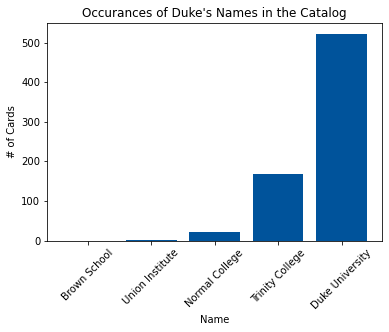

In [12]:
# Create bar chart of Duke name frequencies
plt.bar(names, counts, color='#00539B')
plt.xticks(rotation = 45)
plt.title("Occurances of Duke's Names in the Catalog")
plt.xlabel("Name")
plt.ylabel("# of Cards")
plt.show()

### Average Collection Dates by Name

Let's find the average date of a collection that mentions each of these college names. For this, we will find the average date for each instance of a found name--either a single date or the simple average of the collection's start and end dates--and then the mean of all the instances of the college name.

In [31]:
def find_mean(list):
    total, num = 0, 0
    for date in list:
        dates = date.split("-")
        if len(dates) == 1:
            total += int(dates[0])
        else:
            total += ((int(dates[0]) + int(dates[1])) / 2)
        num += 1
    return round(total / num)

averages = []
averages.append(find_mean(union))
averages.append(find_mean(normal))
averages.append(find_mean(trinity))
averages.append(find_mean(duke))
averages

[1880, 1871, 1884, 1917]

#### *Actual Dates of Institutions:*
Brown School: 1838-1841

Union Institution: 1841-1851

Normal College: 1851-1859

Trinity College: 1859-1924

Duke University: 1924-present


#### *Average Associated Date in the Catalog:*
Brown School: N/A

Union Institution: 1880

Normal College: 1871

Trinity College: 1884

Duke University: 1917

### Names Time Series

Brown School will not be included in the following analysis, as there were no instances of it in the catalog. But, let's see how the other four names' instances are distributed over time in the catalog. For simplicity's sake, for year ranges of catalog collections, each year in the range was counted once (e.g., for 1940-1942, 1940, 1941, and 1941 each got a quantity increase of 1).

In [53]:
def start_end(l, dic):
    for date in l:
        dates = date.split("-")
        if len(dates) == 1:
            if int(dates[0]) not in dic:
                dic[int(dates[0])] = 1
            else:
                dic[int(dates[0])] = dic.get(int(dates[0])) + 1
        elif len(dates) == 2:
            for num in range(int(dates[0]), int(dates[1]) + 1):
                if num not in dic:
                    dic[num] = 1
                else:
                    dic[num] = dic.get(num) + 1
                    
    return dic

In [61]:
dic1, dic2, dic3, dic4 = {}, {}, {}, {}
dic1= start_end(union, dic1)
dic2 = start_end(normal, dic2)
dic3 = start_end(trinity, dic3)
dic4 = start_end(duke, dic4)

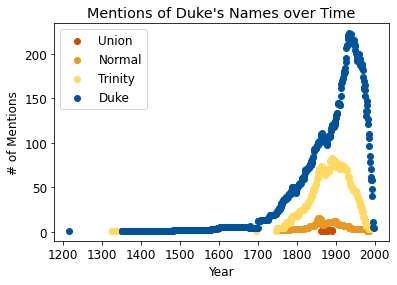

In [72]:
plt.scatter(dic1.keys(), dic1.values(), label='Union', color='#C84E00')
plt.scatter(dic2.keys(), dic2.values(), label='Normal', color='#E89923')
plt.scatter(dic3.keys(), dic3.values(), label='Trinity', color='#FFD960')
plt.scatter(dic4.keys(), dic4.values(), label='Duke', color='#00539B')
plt.legend(loc='upper left')
plt.title("Mentions of Duke's Names over Time")
plt.xlabel("Year")
plt.ylabel("# of Mentions")
plt.show()

This plot shows the quantity of the dates of the collections that mention one of Duke's names, for each of the names. Interestingly enough, all seem to peak around 1900, with the names growing more numerous in mentions as we get closer in time to the present day.